In [1]:
!apt-get install -y git-core ffmpeg espeak-ng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'git' instead of 'git-core'
git is already the newest version (1:2.34.1-1ubuntu1.11).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
The following additional packages will be installed:
  espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
The following NEW packages will be installed:
  espeak-ng espeak-ng-data libespeak-ng1 libpcaudio0 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,526 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpcaudio0 amd64 1.1-6build2 [8,956 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libsonic0 amd64 0.2.0-11build1 [10.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 espeak-ng-data amd64 1.50+dfsg-10ubuntu0.1 [3,956 kB]
Get:4 http://archive.ubuntu.com/ubuntu jamm

In [2]:
!pip install transformers huggingface_hub accelerate datasets numpy pillow safetensors tokenizers torch torchaudio torchvision tqdm timm matplotlib phonemizer gradio
!pip install -U git+https://git@github.com/facebookresearch/audiocraft#egg=audiocraft
!git clone https://github.com/jasonppy/VoiceCraft.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.7 MB/s eta 0:00:00


Cloning into 'VoiceCraft'...
remote: Enumerating objects: 508, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 508 (delta 182), reused 196 (delta 132), pack-reused 236 (from 1)
Receiving objects: 100% (508/508), 2.98 MiB | 4.38 MiB/s, done.
Resolving deltas: 100% (294/294), done.


In [1]:
# simply installing audiocraft breaks due to no config, so move the default into site-packages
%cd /content/VoiceCraft
!git clone https://github.com/facebookresearch/audiocraft.git
!mv audiocraft/config /usr/local/lib/python3.10/dist-packages/
!rm -rf audiocraft

/content/VoiceCraft
Cloning into 'audiocraft'...
remote: Enumerating objects: 1600, done.
remote: Counting objects: 100% (658/658), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 1600 (delta 478), reused 433 (delta 433), pack-reused 942 (from 1)
Receiving objects: 100% (1600/1600), 2.03 MiB | 28.80 MiB/s, done.
Resolving deltas: 100% (902/902), done.


In [2]:
%cd /content
!mkdir -p training_data
!mkdir -p training_data/dataset
!mkdir -p training_data/dataset/flickr30k
!mkdir -p training_data/dataset/mscoco
!mkdir -p training_data/checkpoints
!mkdir -p training_data/pretrained_models

/content


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d hsankesara/flickr-image-dataset
!unzip -qo flickr-image-dataset.zip
!rm -rf flickr-image-dataset.zip
!mv -f /content/flickr30k_images/flickr30k_images /content/training_data/dataset/flickr30k/images
!mv -f /content/flickr30k_images/results.csv /content/training_data/dataset/flickr30k
!rm -rf /content/flickr30k_images

Dataset URL: https://www.kaggle.com/datasets/hsankesara/flickr-image-dataset
License(s): CC0-1.0
100% 8.16G/8.16G [06:50<00:00, 24.0MB/s]
100% 8.16G/8.16G [06:50<00:00, 21.4MB/s]


In [13]:
%cd /content/VoiceCraft

/content/VoiceCraft


In [14]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ["USER"] = "nsandiman"

import io
import torch
import torchaudio
from argparse import Namespace
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch import nn
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import transformers
from typing import Tuple
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import timm
from tqdm import tqdm
from typing import Tuple, List, Dict
import pickle
import warnings
import math
import time
import uuid

import requests
from VoiceCraft.models import voicecraft
from VoiceCraft.inference_tts_scale import inference_one_sample
from VoiceCraft.data.tokenizer import (
    AudioTokenizer,
    TextTokenizer
)
from huggingface_hub import hf_hub_download

import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
import re
from num2words import num2words

import gradio as gr

from IPython.display import Audio

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
%cd /content

/content


In [17]:
class Tokenizer:

    def __init__(self, tokenizer_name, special_tokens_dict=None) -> None:

        self.tokenizer = transformers.AutoTokenizer.from_pretrained(tokenizer_name)
        if special_tokens_dict is None:
           warnings.warn(f"'special_tokens_dict' has not been set, using default special_tokens_dict")
           self.tokenizer.add_special_tokens({
               "bos_token": "[BOS]",
               "eos_token": "[EOS]",
               "pad_token": "[PAD]"
           })
           self.vocab_size = self.tokenizer.vocab_size + 3
           self.pad_token = '[PAD]'
        else:
            assert 'pad_token' in special_tokens_dict, ValueError("'pad_token' key must be present in the 'special_tokens_dict' passed")
            self.tokenizer.add_special_tokens(special_tokens_dict)
            self.vocab_size = self.tokenizer.vocab_size + len(special_tokens_dict)
            self.pad_token = special_tokens_dict['pad_token']

    def encode(self, text, max_len, padding=True) -> Dict[str, torch.Tensor]:
        return self.tokenizer(text, max_length=max_len, padding='max_length' if padding else True,
                              return_tensors='pt')

    def decode(self, token_ids) -> str:
        return self.tokenizer.decode(token_ids)

    def __call__(self, *args, **kwargs):
        return self.encode(*args, **kwargs)

    def get_vocab(self):
        return self.tokenizer.get_vocab()

    def save(self, file_path):
        with open(file_path, "wb") as f:
            pickle.dump(self, f)

    @staticmethod
    def load(file_path):
        with open(file_path, "rb") as f:
            return pickle.load(f)

In [18]:
class PatchEmbeddings(nn.Module):
    """
    Extract patch embeddings from input images using a convolutional layer.
    """
    def __init__(self, config):

        super().__init__()

        # Convolutional layer to create patch embeddings
        self.conv_patch_layer = nn.Conv2d(
            in_channels=config['channels'],
            out_channels=config['d_model'],
            kernel_size=config['patch_size'],
            stride=config['patch_size']
        )

        # Flatten patches into a 2D tensor for further processing
        self.flatten = nn.Flatten(start_dim=2, end_dim=3)

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        # Apply convolution to extract patch embeddings
        patched_tensor = self.conv_patch_layer(x)

        # Flatten the patched tensor
        flattend_tensor = self.flatten(patched_tensor)

        # Permute dimensions to match (B, num_patches, d_model) format
        return flattend_tensor.permute(0, 2, 1)


In [19]:
class ViTEmbedding(nn.Module):
    """
    Create embeddings including positional and class tokens.
    """
    def __init__(self, config):

        super().__init__()

        self.patch_embeddings = PatchEmbeddings(config)

        self.class_token_embedding = nn.Parameter(
            data=torch.randn(size=(1, 1, config['d_model'])),
            requires_grad=True
        )

        self.positional_embedding = nn.Parameter(
            data=torch.randn(size=(1, config['num_patches'] + 1, config['d_model'])),
            requires_grad=True
        )

        self.dropout = nn.Dropout(config['emb_dropout'])

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        patch_embed = self.patch_embeddings(x)

        patch_embeddings_with_class_token = torch.cat(
            tensors=(self.class_token_embedding.repeat(patch_embed.shape[0], 1, 1), patch_embed),
            dim=1
        )

        return self.dropout(patch_embeddings_with_class_token + self.positional_embedding)



In [20]:
class MSABlock(nn.Module):
    """
    Multihead Self-Attention block.
    """
    def __init__(self, config) -> None:

        super().__init__()

        # Multihead self-attention layer
        self.attn_block = nn.MultiheadAttention(
            embed_dim=config["d_model"],
            num_heads=config["num_heads"],
            batch_first=True,
            dropout=config['attn_dropout']
        )

        # Layer normalization for attention output
        self.layer_norm = nn.LayerNorm(normalized_shape=config["d_model"])

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        attn_output, _ = self.attn_block(x, x, x)

        return self.layer_norm(x + attn_output)


In [21]:
class MLPBlock(nn.Module):
    """
    Feed-Forward Network block.
    """
    def __init__(self, config) -> None:

        super().__init__()
        d_model = config["d_model"]

        self.dense_net = nn.Sequential(
            nn.Linear(d_model, d_model * 4),
            nn.GELU(),
            nn.Dropout(p=config['mlp_dropout']),
            nn.Linear(d_model * 4, d_model)
        )

        self.layer_norm = nn.LayerNorm(normalized_shape=d_model)

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        return self.layer_norm(x + self.dense_net(x))


In [22]:
class EncoderBlock(nn.Module):
    """
    Encoder block combining both Multihead Self-Attention and Feed-Forward Network blocks.
    """
    def __init__(self, config) -> None:

        super().__init__()
        self.msa_block = MSABlock(config)
        self.mlp_block = MLPBlock(config)

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        return self.mlp_block(self.msa_block(x))


In [23]:
class Encoder(nn.Module):
    """
    The Vision Transformer (ViT) encoder.
    """
    def __init__(self, config) -> None:

        super().__init__()
        self.blocks = nn.ModuleList([EncoderBlock(config) for _ in range(config["num_encoders"])])

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        for block in self.blocks:
            x = block(x)

        return x


In [24]:
class ViT(nn.Module):
    """
    Vision Transformer (ViT) model.
    """
    def __init__(self, config) -> None:

        super().__init__()

        self.embedding_layer = ViTEmbedding(config)
        self.encoder = Encoder(config)

    def forward(self, images: torch.Tensor) -> torch.Tensor:

        embeddings = self.embedding_layer(images)

        encoded_vectors = self.encoder(embeddings)

        return encoded_vectors[:, 0, :]



In [25]:
class GPTEmbedding(nn.Module):
    """
    GPT decoder embedding class.
    """
    def __init__(self, config) -> None:

        super().__init__()
        self.token_embedding = nn.Embedding(
            num_embeddings=config["vocab_size"],
            embedding_dim=config["d_model"]
        )

        self.positional_encoding = nn.Parameter(
            data=torch.randn(size=(1, config["context_length"], config["d_model"])),
            requires_grad=True
        )
        self.dropout = nn.Dropout(p=config['emb_dropout'])

    def forward(self, tokens: torch.Tensor) -> torch.Tensor:

        token_embeddings = self.token_embedding(tokens)
        return self.dropout(self.positional_encoding[:, :tokens.shape[1], :] + token_embeddings)



In [26]:
class CausalSelfAttnBlock(nn.Module):
    """
    GPT causal self-attention block.
    """
    def __init__(self, config) -> None:

        super().__init__()
        assert config["d_model"] % config["num_heads"] == 0, \
            ValueError(f"{config['d_model']} d_model should be exactly divisible by {config['num_heads']} num_heads")

        self.d_model = config["d_model"]
        self.head_dim = config["d_model"] // config["num_heads"]
        self.num_heads = config["num_heads"]
        self.softmax_eps = config["softmax_eps"]

        self.projection_layer = nn.Linear(self.d_model, self.d_model * 3)
        self.out_layer = nn.Linear(self.d_model, self.d_model)
        self.layer_norm = nn.LayerNorm(normalized_shape=self.d_model)
        self.attn_dropout = nn.Dropout(p=config['attn_dropout'])

    def _safe_softmax(self, x: torch.Tensor) -> torch.Tensor:

        num = torch.exp(x)
        denom = torch.exp(x).sum(dim=-1, keepdim=True) + self.softmax_eps
        return num / denom

    def forward(self, x: torch.Tensor, attn_mask: torch.Tensor) -> torch.Tensor:

        B, CTX_LENGTH = x.shape[0], x.shape[1]
        q, k, v = self.projection_layer(x).split(self.d_model, dim=2)  # B, CTX_LENGTH, d_model
        q = q.view(B, CTX_LENGTH, self.num_heads, self.head_dim).transpose(1, 2)  # B, num_heads, CTX_LENGTH, head_dim
        k = k.view(B, CTX_LENGTH, self.num_heads, self.head_dim).transpose(1, 2)
        v = v.view(B, CTX_LENGTH, self.num_heads, self.head_dim).transpose(1, 2)

        q_k_prod = (q @ k.transpose(2, 3)) + attn_mask.unsqueeze(1)  # B, num_heads, CTX_LENGTH, CTX_LENGTH
        wts = self._safe_softmax(q_k_prod / math.sqrt(self.head_dim))  # B, num_heads, CTX_LENGTH, CTX_LENGTH
        wts = self.attn_dropout(wts)
        attn_outputs = wts @ v  # B, num_heads, CTX_LENGTH, head_dim
        y = attn_outputs.transpose(1, 2).contiguous().view(B, CTX_LENGTH, -1)
        return self.layer_norm(x + self.out_layer(y))



In [27]:
class CrossAttnBlock(nn.Module):
    """
    GPT cross-attention block.
    """
    def __init__(self, config) -> None:

        super().__init__()
        assert config["d_model"] % config["num_heads"] == 0, \
            ValueError(f"{config['d_model']} d_model must be divisible by {config['num_heads']} num_heads")

        self.d_model = config['d_model']
        self.num_heads = config['num_heads']
        self.head_dim = self.d_model // self.num_heads
        self.q_proj = nn.Linear(self.d_model, self.d_model)
        self.k_proj = nn.Linear(self.d_model, self.d_model)
        self.v_proj = nn.Linear(self.d_model, self.d_model)
        self.projection_layer = nn.Linear(self.d_model, self.d_model)
        self.layer_norm = nn.LayerNorm(normalized_shape=self.d_model)
        self.attn_dropout = nn.Dropout(p=config['attn_dropout'])

    def forward(self, x: torch.Tensor, image_encoding: torch.Tensor) -> torch.Tensor:

        B, CTX_LENGTH, _ = x.shape

        q = self.q_proj(x).view(B, CTX_LENGTH, self.num_heads, self.head_dim).permute(0, 2, 1, 3)  # B, num_heads, CTX_LENGTH, head_dim
        k = self.k_proj(image_encoding).view(B, 1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)  # B, num_heads, 1, head_dim
        v = self.v_proj(image_encoding).view(B, 1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)  # B, num_heads, 1, head_dim

        wts = F.softmax((q @ k.transpose(2, 3)) / math.sqrt(self.head_dim), dim=-1)  # B, num_heads, CTX_LENGTH, 1
        wts = self.attn_dropout(wts)
        y = wts @ v  # B, num_heads, CTX_LENGTH, head_dim
        y = y.transpose(1, 2).contiguous().view(B, CTX_LENGTH, -1)  # B, CTX_LENGTH, d_model
        return self.layer_norm(x + self.projection_layer(y))


In [28]:
class GPTDecoderBlock(nn.Module):
    """
    GPT decoder block.
    """
    def __init__(self, config) -> None:

        super().__init__()
        self.csa_block = CausalSelfAttnBlock(config)
        self.cross_attn_block = CrossAttnBlock(config)
        self.mlp_block = MLPBlock(config)

    def forward(self, x: torch.Tensor, image_encoding: torch.Tensor, attn_mask: torch.Tensor) -> torch.Tensor:

        csa_out = self.csa_block(x, attn_mask)
        cross_out = self.cross_attn_block(csa_out, image_encoding)
        mlp_out = self.mlp_block(cross_out)
        return mlp_out


In [29]:
class GPTDecoder(nn.Module):
    """
    GPT decoder.
    """
    def __init__(self, config) -> None:

        super().__init__()
        self.decoder_blocks = nn.ModuleList([GPTDecoderBlock(config) for _ in range(config["num_decoders"])])

    def forward(self, x: torch.Tensor, image_encoding: torch.Tensor, attn_mask: torch.Tensor) -> torch.Tensor:

        for block in self.decoder_blocks:
            x = block(x, image_encoding, attn_mask)

        return x


In [30]:
class GPT(nn.Module):
    """
    GPT model for image caption generation.
    """
    def __init__(self, config) -> None:

        super().__init__()
        self.device = config["device"]
        self.context_length = config["context_length"]
        self.softmax_eps = config["softmax_eps"]
        self.embedding = GPTEmbedding(config)
        self.decoder = GPTDecoder(config)
        self.cls_head = nn.Linear(config["d_model"], config["vocab_size"])
        self.cls_head.weight = self.embedding.token_embedding.weight
        # Removed weight tying as it led to slower convergence
        self.ignore_index = config["ignore_index"]

    def _create_mask(self, context_length: int, attn_mask: torch.Tensor) -> torch.Tensor:

        mask = torch.triu(
            input=torch.ones(size=(context_length, context_length), requires_grad=False) * float("-inf"),
            diagonal=1
        ).unsqueeze(0).repeat(attn_mask.shape[0], 1, 1)
        mask = mask.to(self.device)
        for i in range(mask.shape[0]):
            mask[i, attn_mask[i].logical_not(), :] = float("-inf")
        return mask  # B, CTX_LENGTH, CTX_LENGTH

    def forward(self, tokens: torch.Tensor, image_encoding: torch.Tensor, attn_mask: torch.Tensor, targets: torch.Tensor = None) -> Tuple[torch.Tensor]:

        embeddings = self.embedding(tokens)  # B, CTX_LENGTH, d_model
        mask = self._create_mask(tokens.shape[1], attn_mask)
        decoder_out = self.decoder(embeddings, image_encoding, mask)  # B, CTX_LENGTH, d_model
        logits = self.cls_head(decoder_out)  # B, CTX_LENGTH, vocab_size
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.shape[-1]), targets.reshape(-1), ignore_index=self.ignore_index)

        return logits, loss



In [31]:
class ImageCaptioner(nn.Module):
    """
    Vision language main class for image captioning.
    """

    def __init__(self, config) -> None:

        super().__init__()

        self.device = config['device']
        self.is_vit_pretrained = False

        # Initialize Vision Transformer
        if config['vit_kwargs']["pretrained_model_name"] is not None:
            self.is_vit_pretrained = True
            self.vit = timm.create_model(
                model_name=config['vit_kwargs']["pretrained_model_name"],
                pretrained=True,
                num_classes=0,
                global_pool='avg'
            )
            config["vit_kwargs"]["d_model"] = self.vit.embed_dim
        else:
            self.vit = ViT(config['vit_kwargs'])

        # Initialize GPT
        self.gpt = GPT(config['gpt_kwargs'])

        # Linear layer to map image encoding dimension to GPT's input dimension
        self.dimension_mapping_layer = nn.Linear(config["vit_kwargs"]['d_model'], config["gpt_kwargs"]['d_model'])

    def forward(self, image: torch.Tensor, tokens: torch.Tensor, attn_mask: torch.Tensor, targets: torch.Tensor=None) -> Tuple[torch.Tensor]:

        # Encode image
        image_encoding = self.vit(image)  # (B, d_model)

        # Map image encoding to GPT's input dimension
        dimension_mapped_image_encoding = self.dimension_mapping_layer(image_encoding[:, None, :])  # (B, 1, d_model)

        # Forward pass through GPT
        return self.gpt(tokens, dimension_mapped_image_encoding, attn_mask, targets)

    @torch.inference_mode()
    def generate(self,
                 image: torch.Tensor,
                 sos_token: int,
                 eos_token: int,
                 max_len: int=40) -> List[int]:

        # Encode image
        image_encoding = self.vit(image)  # (B, d_model)

        # Map image encoding to GPT's input dimension
        dimension_mapped_image_encoding = self.dimension_mapping_layer(image_encoding[:, None, :])  # (B, 1, d_model)

        # Initialize tokens with the start-of-sequence token
        tokens = torch.tensor([[sos_token]], requires_grad=False).to(self.device)
        attn_mask = torch.tensor([[1]], requires_grad=False).to(self.device)

        while tokens.shape[1] < max_len and tokens[0, -1] != eos_token:
            # Forward pass through GPT
            logits, _ = self.gpt(tokens, dimension_mapped_image_encoding, attn_mask, None)  # (1, N+1, vocab_size)

            # Predict the next token
            next_token = torch.argmax(logits[0, -1, :], dim=0).item()

            # Append the predicted token to the sequence
            tokens = torch.cat(
                (tokens, torch.tensor([[next_token]], requires_grad=False)),
                dim=-1
            ).to(self.device)

            # Update attention mask
            attn_mask = torch.cat(
                (attn_mask, torch.tensor([[1]], requires_grad=False)),
                dim=-1
            ).to(self.device)

        return list(tokens[0])

    @classmethod
    def from_pretrained(cls, checkpoint, device):

        if not os.path.exists(checkpoint):
            raise FileNotFoundError(f"{checkpoint} does not exist")

        cp = torch.load(checkpoint, map_location=device)

        # Update device information in the model configuration
        cp['model_config']['device'] = device
        cp['model_config']['vit_kwargs']['device'] = device
        cp['model_config']['gpt_kwargs']['device'] = device

        # Initialize model with configuration and load state_dict
        model = cls(cp['model_config'])
        model.load_state_dict(cp['model_state_dict'])
        model = model.to(device)

        return model



In [32]:
def clear_console():
    """
    Clears the console based on the operating system.
    """
    if os.name == "nt":
        os.system("cls")
    else:
        os.system("clear")


class Trainer:
    """
    Trainer class for image captioning model.
    """

    def __init__(self, model_config, train_config, dls, tokenizer) -> None:

        self.device = train_config["device"]

        # Load model from checkpoint if provided, else initialize a new model
        if train_config["checkpoint"] is not None:
            self.model = ImageCaptioner(model_config).from_pretrained(
                train_config["checkpoint"], self.device
            )
        else:
            self.model = ImageCaptioner(model_config).to(self.device)

        self.train_config = train_config
        self.model_config = model_config
        self.train_dl, self.test_dl = dls
        self.metrics = pd.DataFrame(
            columns=[
                "epoch",
                "train_loss",
                "test_loss",
                "train_perplexity",
                "test_perplexity",
                "elapsed_time",
            ]
        )
        self.tokenizer = tokenizer
        self.writer = SummaryWriter(train_config["experiment_name"])

        # Transformation pipeline for images
        self.transform = transforms.Compose(
            [
                transforms.Resize(
                    size=(model_config["img_size"], model_config["img_size"])
                ),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    def fit(self, verbose=True):

        global_step = 0
        start_time = time.time()

        # Freeze the pretrained ViT (Vision Transformer) parameters during initial epochs
        if self.model.is_vit_pretrained and self.train_config["freeze_epochs"] > 0:
            for p in self.model.vit.parameters():
                p.requires_grad = False

        # Set up optimizer with learning rates for different model parts
        self.optimizer = torch.optim.Adam(
            [
                {
                    "params": self.model.vit.parameters(),
                    "lr": 0,
                },  # Vit params are initially frozen
                {
                    "params": self.model.dimension_mapping_layer.parameters(),
                    "lr": self.train_config["lr"],
                },
                {"params": self.model.gpt.parameters(), "lr": self.train_config["lr"]},
            ],
            weight_decay=self.train_config["weight_decay"],
        )

        # Initial training with frozen ViT parameters
        for epoch in range(self.train_config["freeze_epochs"]):
            train_loss, train_perplexity, global_step = self._train(epoch, global_step)
            test_loss, test_perplexity, global_step = self._eval(epoch, global_step)
            elapsed_time = time.time() - start_time
            new_row = pd.DataFrame(
                data={
                    "epoch": [epoch + 1],
                    "train_loss": [train_loss],
                    "test_loss": [test_loss],
                    "elapsed_time": [elapsed_time],
                    "train_perplexity": [train_perplexity],
                    "test_perplexity": [test_perplexity],
                }
            )

            # Store training metrics
            self.metrics = pd.concat([self.metrics, new_row], axis=0, ignore_index=True)

            # Clear console and print metrics
            clear_console()
            print(self.metrics.to_string(index=False))

        # Unfreeze the ViT parameters after initial epochs
        if self.model.is_vit_pretrained and self.train_config["freeze_epochs"] > 0:
            for p in self.model.vit.parameters():
                p.requires_grad = True

        self.optimizer.param_groups[0]["lr"] = self.train_config[
            "lr"
        ]  # Unfreeze ViT params

        # Further training with all parameters unfrozen
        for epoch in range(
            self.train_config["freeze_epochs"], self.train_config["epochs"]
        ):
            train_loss, train_perplexity, global_step = self._train(epoch, global_step)
            test_loss, test_perplexity, global_step = self._eval(epoch, global_step)
            elapsed_time = time.time() - start_time
            new_row = pd.DataFrame(
                data={
                    "epoch": [epoch + 1],
                    "train_loss": [train_loss],
                    "test_loss": [test_loss],
                    "elapsed_time": [elapsed_time],
                    "train_perplexity": [train_perplexity],
                    "test_perplexity": [test_perplexity],
                }
            )

            # Store training metrics
            self.metrics = pd.concat([self.metrics, new_row], axis=0, ignore_index=True)

            # Clear console and print metrics
            clear_console()
            print(self.metrics.to_string(index=False))

        # Save the final model checkpoint
        self.save("/content/training_data/checkpoints/imagecraft.pt")
        return self.metrics

    def _train(self, epoch, global_step):

        self.model.train()
        total_loss = 0
        train_batchiter = tqdm(
            self.train_dl, desc=f"Processing Training Epoch {epoch:02d}"
        )

        for image, tokens, attn_mask in train_batchiter:
            # Prepare inputs and targets
            input_tokens, target_tokens = tokens[:, :-1], tokens[:, 1:]
            attn_mask = attn_mask[:, :-1]
            image, input_tokens, target_tokens, attn_mask = (
                image.to(self.device),
                input_tokens.to(self.device),
                target_tokens.to(self.device),
                attn_mask.to(self.device),
            )

            # Forward pass and compute loss
            _, loss = self.model(image, input_tokens, attn_mask, target_tokens)
            total_loss += loss.item()

            # Update progress bar with loss and perplexity
            train_batchiter.set_postfix(
                {
                    "Train Loss": f"{loss.item():6.3f}",
                    "Train Perplexity": f"{torch.exp(torch.tensor(loss.item())).item()}",
                }
            )

            # Log the Loss to TensorBoard
            self.writer.add_scalar("Loss/train", loss.item(), global_step)
            self.writer.flush()

            # Backpropagation and optimizer step
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            global_step += 1

        # Compute average loss and perplexity
        avg_loss = total_loss / len(self.train_dl)
        train_perplexity = torch.exp(torch.tensor(avg_loss))
        return avg_loss, train_perplexity.item(), global_step

    def _eval(self, epoch, global_step):

        self.model.eval()
        total_loss = 0
        test_batchiter = tqdm(self.test_dl, desc=f"Processing Eval Epoch {epoch:02d}")

        with torch.no_grad():
            for image, tokens, attn_mask in test_batchiter:
                # Prepare inputs and targets
                input_tokens, target_tokens = tokens[:, :-1], tokens[:, 1:]
                attn_mask = attn_mask[:, :-1]
                image, input_tokens, target_tokens, attn_mask = (
                    image.to(self.device),
                    input_tokens.to(self.device),
                    target_tokens.to(self.device),
                    attn_mask.to(self.device),
                )

                # Forward pass and compute loss
                _, loss = self.model(image, input_tokens, attn_mask, target_tokens)
                total_loss += loss.item()

                # Update progress bar with loss and perplexity
                test_batchiter.set_postfix(
                    {
                        "Test Loss": f"{loss.item():6.3f}",
                        "Test Perplexity": f"{torch.exp(torch.tensor(loss.item())).item()}",
                    }
                )

                # Log the Loss to TensorBoard
                self.writer.add_scalar("Loss/eval", loss.item(), global_step)
                self.writer.flush()

                global_step += 1

        # Compute average loss and perplexity
        avg_loss = total_loss / len(self.test_dl)
        test_perplexity = torch.exp(torch.tensor(avg_loss))
        return avg_loss, test_perplexity.item(), global_step

    def inference(self, image_path, max_len) -> str:

        # Preprocess image
        image_tensor = (
            self.transform(Image.open(image_path)).unsqueeze(0).to(self.device)
        )

        # Generate tokens using the model
        tokens = self.model.generate(
            image_tensor,
            sos_token=self.tokenizer.get_vocab()["[BOS]"],
            eos_token=self.tokenizer.get_vocab()["[EOS]"],
            max_len=max_len,
        )

        # Decode tokens to generate caption
        return self.tokenizer.decode(token_ids=[token.item() for token in tokens])

    def save(self, file_path):

        checkpoint = {
            "model_state_dict": self.model.state_dict(),
            "optimizer_state_dict": self.optimizer.state_dict(),
            "train_config": self.train_config,
            "model_config": self.model_config,
        }

        torch.save(checkpoint, file_path)

    def plot_metrics(self):
        """
        Plots and saves training and test loss and perplexity metrics.
        """
        plt.figure(figsize=(12, 6))

        # Plot training and test loss
        plt.subplot(1, 2, 1)
        plt.plot(self.metrics["epoch"], self.metrics["train_loss"], label="Train Loss")
        plt.plot(self.metrics["epoch"], self.metrics["test_loss"], label="Test Loss")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.title("Training and Test Loss Over Epochs")
        plt.legend()
        plt.grid(True)

        # Plot training and test perplexity
        plt.subplot(1, 2, 2)
        plt.plot(
            self.metrics["epoch"],
            self.metrics["train_perplexity"],
            label="Train Perplexity",
        )
        plt.plot(
            self.metrics["epoch"],
            self.metrics["test_perplexity"],
            label="Test Perplexity",
        )
        plt.xlabel("epoch")
        plt.ylabel("perplexity")
        plt.title("Training and Test Perplexity Over Epochs")
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.savefig("/content/training_data/checkpoints/metrics.png")
        plt.show()



In [33]:
class ImageCaptionerPipeline:
    """
    A pipeline for predicting image captions using a pre-trained image captioning model.
    """

    def __init__(self, checkpoint: str, max_len: int, device: str, tokenizer=None):

        if tokenizer is None:
            # Initialize the tokenizer if not provided
            self.tokenizer = Tokenizer(
                tokenizer_name="gpt2",
                special_tokens_dict={
                    "bos_token": "[BOS]",
                    "eos_token": "[EOS]",
                    "pad_token": "[PAD]",
                },
            )
        else:
            self.tokenizer = tokenizer

        # Update model configuration with tokenizer-specific settings
        config["gpt_kwargs"]["vocab_size"] = self.tokenizer.vocab_size
        config["gpt_kwargs"]["ignore_index"] = self.tokenizer.get_vocab()[
            self.tokenizer.pad_token
        ]
        self.max_len = max_len
        self.device = device

        self.model = ImageCaptioner(config).from_pretrained(checkpoint, device)
        self.model.eval()

        self.transform = transforms.Compose(
            [
                transforms.Resize(size=(config["img_size"], config["img_size"])),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    def inference(self, image_path: str) -> str:

        # Load and transform the image
        image_tensor = (
            self.transform(Image.open(image_path)).unsqueeze(0).to(self.device)
        )

        # Generate caption using the model
        tokens = self.model.generate(
            image_tensor,
            sos_token=self.tokenizer.get_vocab()["[BOS]"],
            eos_token=self.tokenizer.get_vocab()["[EOS]"],
            max_len=self.max_len,
        )

        # Decode the generated token IDs to a caption string
        return self.tokenizer.decode(token_ids=[token.item() for token in tokens[1:-1]])




In [34]:
class VoiceCraftTTSPipeline:
    """
    A voicecraft pipeline for converting text to speech.
    """

    def __init__(
        self,
        model_name="gigaHalfLibri330M_TTSEnhanced_max16s.pth",
        encodec_fn="encodec_4cb2048_giga.th",
    ):
        model = voicecraft.VoiceCraft.from_pretrained(
            f"pyp1/VoiceCraft_{model_name.replace('.pth', '')}"
        )

        encodec_path = f"/content/training_data/pretrained_models/{encodec_fn}"

        if not os.path.exists(encodec_path):
            os.system(
                f"wget https://huggingface.co/pyp1/VoiceCraft/resolve/main/encodec_4cb2048_giga.th"
            )
            os.system(
                f"mv encodec_4cb2048_giga.th /content/training_data/pretrained_models/encodec_4cb2048_giga.th"
            )
        self.device = "cuda" if torch.cuda.is_available() else "cpu"

        self.audio_tokenizer = AudioTokenizer(
            signature=encodec_path, device=self.device
        )
        self.text_tokenizer = TextTokenizer(backend="espeak")

        self.phn2num = model.args.phn2num
        self.config = vars(model.args)
        model.to(self.device)
        self.model = model

        self.orig_audio = "/content/VoiceCraft/demo/84_121550_000074_000000.wav"
        self.orig_transcript = "But when I had approached so near to them The common object, which the sense deceives, Lost not by distance any of its marks"
        self.cut_off_sec = 67.87

        self.codec_audio_sr = 16000
        self.codec_sr = 50
        self.top_k = 0
        self.top_p = 0.9
        self.temperature = 1
        self.silence_tokens = [1388, 1898, 131]
        self.kvcache = 1
        self.stop_repetition = 3
        self.sample_batch_size = 2
        self.seed = 1

    def generate(self, text):

        text = replace_numbers_with_words(text).replace("  ", " ").replace("  ", " ")

        sentences = sent_tokenize(text.replace("\n", " "))

        info = torchaudio.info(self.orig_audio)
        audio_dur = info.num_frames / info.sample_rate

        audio_tensors = []
        transcript = ""

        for sentence in tqdm(sentences):
            decode_config = {
                "top_k": self.top_k,
                "top_p": self.top_p,
                "temperature": self.temperature,
                "stop_repetition": self.stop_repetition,
                "kvcache": self.kvcache,
                "codec_audio_sr": self.codec_audio_sr,
                "codec_sr": self.codec_sr,
                "silence_tokens": self.silence_tokens,
                "sample_batch_size": self.sample_batch_size,
            }
            transcript = self.orig_transcript
            transcript += sentence + "\n"

            prompt_end_frame = int(min(audio_dur, self.cut_off_sec) * info.sample_rate)

            transcript = (
                replace_numbers_with_words(transcript)
                .replace("  ", " ")
                .replace("  ", " ")
            )

            _, gen_audio = inference_one_sample(
                self.model,
                Namespace(**self.config),
                self.phn2num,
                self.text_tokenizer,
                self.audio_tokenizer,
                self.orig_audio,
                transcript,
                self.device,
                decode_config,
                prompt_end_frame,
            )
            gen_audio = gen_audio[0].cpu()
            audio_tensors.append(gen_audio)

        output_audio = get_output_audio(audio_tensors, self.codec_audio_sr)
        return output_audio



In [35]:
class ImageCraft:
    """
    The imagecraft main class.
    """

    def __init__(self, checkpoint: str, max_len: int, device: str, tokenizer=None):

        if tokenizer is None:
            # Initialize the tokenizer if not provided
            self.tokenizer = Tokenizer(
                tokenizer_name="gpt2",
                special_tokens_dict={
                    "bos_token": "[BOS]",
                    "eos_token": "[EOS]",
                    "pad_token": "[PAD]",
                },
            )
        else:
            self.tokenizer = tokenizer

        # Update model configuration with tokenizer-specific settings
        config["gpt_kwargs"]["vocab_size"] = self.tokenizer.vocab_size
        config["gpt_kwargs"]["ignore_index"] = self.tokenizer.get_vocab()[
            self.tokenizer.pad_token
        ]
        self.max_len = max_len
        self.device = device

        self.model = ImageCaptioner(config).from_pretrained(checkpoint, device)
        self.model.eval()

        self.transform = transforms.Compose(
            [
                transforms.Resize(size=(config["img_size"], config["img_size"])),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ),
            ]
        )

    def generate(self, image_path: str) -> str:

        # Load and transform the image
        image_tensor = (
            self.transform(Image.open(image_path)).unsqueeze(0).to(self.device)
        )

        # Generate caption using the model
        tokens = self.model.generate(
            image_tensor,
            sos_token=self.tokenizer.get_vocab()["[BOS]"],
            eos_token=self.tokenizer.get_vocab()["[EOS]"],
            max_len=self.max_len,
        )

        # Decode the generated token IDs to a caption string
        decoded_caption = self.tokenizer.decode(token_ids=[token.item() for token in tokens[1:-1]])
        voicecraft_pipeline = VoiceCraftTTSPipeline()
        return voicecraft_pipeline.generate(decoded_caption)




In [36]:
class CaptionDataset(Dataset):

    def __init__(self, dataframe: pd.DataFrame, image_size: int, context_length: int, tokenizer) -> None:

        assert dataframe.columns[0] == 'image_name', ValueError("The first column should be the path to the image")
        assert dataframe.columns[1] == "caption", ValueError("The second column should be named 'caption'")

        self.tokenizer = tokenizer
        self.context_length = context_length
        self.df = dataframe

        # Transformation pipeline for images
        self.transform = transforms.Compose([
            transforms.Resize(size=(image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __len__(self) -> int:

        return self.df.shape[0]

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:

        image, text = Image.open(self.df.iloc[idx, 0]), self.df.iloc[idx, 1]
        image_tensor = self.transform(image)  # Apply transformations to the image
        op = self.tokenizer(text, max_len=self.context_length + 1)  # Tokenize the caption
        tokens, attention_mask = op['input_ids'].squeeze(), op['attention_mask'].squeeze()
        return image_tensor, tokens, attention_mask

In [37]:
def replace_numbers_with_words(sentence):
    sentence = re.sub(r"(\d+)", r" \1 ", sentence)

    def replace_with_words(match):
        num = match.group(0)
        try:
            return num2words(num)
        except:
            return num

    return re.sub(r"\b\d+\b", replace_with_words, sentence)


def get_output_audio(audio_tensors, codec_audio_sr):

    result = torch.cat(audio_tensors, 1)
    buffer = io.BytesIO()
    torchaudio.save(buffer, result, int(codec_audio_sr), format="wav")
    buffer.seek(0)
    return buffer.read()

def process_flickr30k(csv_file_path: str, image_folder: str) -> pd.DataFrame:
    df = pd.read_csv(csv_file_path, delimiter="|")
    df.drop_duplicates(subset=['image_name'], inplace=True)
    df.drop(columns=" comment_number", axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename({" comment": "caption"}, axis=1, inplace=True)
    df.iloc[:, 0] = image_folder + "/" + df.iloc[:, 0]
    df["caption"] = "[BOS] " + df["caption"] + " [EOS]"

    return df


def process_and_save_flickr30k(csv_file_path: str, image_folder: str):
    dataset_path = "/content/training_data/dataset/flickr30k/preprocessed_data.csv"
    df = pd.read_csv(csv_file_path, delimiter="|")
    # df.drop_duplicates(subset=['image_name'], inplace=True)
    df.drop(columns=" comment_number", axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename({" comment": "caption"}, axis=1, inplace=True)
    df.iloc[:, 0] = image_folder + "/" + df.iloc[:, 0]
    df["caption"] = "[BOS] " + df["caption"] + " [EOS]"
    df.to_csv(dataset_path, index=False)
    return dataset_path


def train_test_split(
    train_config: dict, model_config: dict, data: pd.DataFrame, tokenizer
) -> Tuple[DataLoader, DataLoader]:
    idxs = set(range(data.shape[0]))

    # Randomly split indices for training and testing
    train_idxs = random.sample(
        sorted(idxs), k=int(len(idxs) * train_config["train_size"])
    )
    test_idxs = list(idxs.difference(set(train_idxs)))

    # Split data into training and testing sets
    train_data = data.copy(deep=True).iloc[train_idxs, :].reset_index(drop=True)
    test_data = data.copy(deep=True).iloc[test_idxs, :].reset_index(drop=True)

    # Create dataset objects for training and testing
    train_dataset = CaptionDataset(
        dataframe=train_data,
        image_size=model_config["img_size"],
        context_length=model_config["gpt_kwargs"]["context_length"],
        tokenizer=tokenizer,
    )

    test_dataset = CaptionDataset(
        dataframe=test_data,
        image_size=model_config["img_size"],
        context_length=model_config["gpt_kwargs"]["context_length"],
        tokenizer=tokenizer,
    )

    # Create DataLoader objects for training and testing datasets
    train_dl = DataLoader(
        dataset=train_dataset,
        batch_size=train_config["batch_size"],
        shuffle=True,
        num_workers=2,
    )

    test_dl = DataLoader(
        dataset=test_dataset, batch_size=train_config["batch_size"], shuffle=False
    )

    return train_dl, test_dl


In [38]:
# Configuration Parameters
img_size = 224  # Image size (height and width) in pixels
ctx_length = 256  # Length of the context (sequence length) for GPT
num_encoders_vit = 8  # Number of encoder layers in the Vision Transformer
num_heads_vit = 4  # Number of attention heads in the Vision Transformer
ps = 16  # Patch size (height and width) for the Vision Transformer
c = 3  # Number of color channels (RGB) in the image
d_model_vit = ps**2 * c  # Dimension of the model (embedding dimension) for the Vision Transformer
num_patches = (img_size * img_size) // (ps * ps)  # Number of patches in the input image
d_model_gpt = 512  # Dimension of the model (embedding dimension) for GPT
num_decoders_gpt = 8  # Number of decoder layers in GPT
num_heads_gpt = 8  # Number of attention heads in GPT
softmax_denom_eps = 1e-9  # Epsilon for numerical stability in softmax calculation
device = "cuda" if torch.cuda.is_available() else "cpu"  # Device to use (GPU if available, otherwise CPU)
attn_dropout = 0.25  # Dropout probability for attention layers
mlp_dropout = 0.25  # Dropout probability for the MLP layers
emb_dropout = 0.25  # Dropout probability for the embedding layers

# Vision Transformer Configuration
vit_kwargs = {
    "num_encoders": num_encoders_vit,  # Number of encoder layers
    "num_heads": num_heads_vit,  # Number of attention heads
    "num_patches": num_patches,  # Number of patches in the image
    "patch_size": ps,  # Size of each patch
    "channels": c,  # Number of input channels
    "d_model": d_model_vit,  # Dimension of the model (embedding dimension)
    "pretrained_model_name": None,  # Pretrained model name (None means no pretrained model)
    "device": device,  # Device to use (GPU or CPU)
    "emb_dropout": emb_dropout,  # Dropout probability for embedding layers
    "mlp_dropout": mlp_dropout,  # Dropout probability for MLP layers
    "attn_dropout": attn_dropout  # Dropout probability for attention layers
}

# GPT Configuration
gpt_kwargs = {
    "d_model": d_model_gpt,  # Dimension of the model (embedding dimension)
    "context_length": ctx_length,  # Length of the context (sequence length)
    "num_decoders": num_decoders_gpt,  # Number of decoder layers
    "softmax_eps": softmax_denom_eps,  # Epsilon for numerical stability in softmax
    "num_heads": num_heads_gpt,  # Number of attention heads
    "device": device,  # Device to use (GPU or CPU)
    "emb_dropout": emb_dropout,  # Dropout probability for embedding layers
    "mlp_dropout": mlp_dropout,  # Dropout probability for MLP layers
    "attn_dropout": attn_dropout  # Dropout probability for attention layers
    # Add ignore_index and vocab_size before using in the model
}

# Complete Configuration
config = {
    "vit_kwargs": vit_kwargs,  # Vision Transformer configuration
    "gpt_kwargs": gpt_kwargs,  # GPT configuration
    "device": device,  # Device to use (GPU or CPU)
    'img_size': img_size  # Image size
}

In [39]:
csv_file_path = '/content/training_data/dataset/flickr30k/results.csv'
image_folder = '/content/training_data/dataset/flickr30k/images'
preprocessed_data = process_and_save_flickr30k(csv_file_path, image_folder)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

Processing Training Epoch 00:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 00: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s, Test Loss=20.972, Test Perplexity=1282002560.0]
<ipython-input-32-d9523d7365ce>:100: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.metrics = pd.concat([self.metrics, new_row], axis=0, ignore_index=True)


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303   22.58557      2.347913e+15     6438551040.0     76.508206


Processing Training Epoch 01:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 01: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s, Test Loss=17.312, Test Perplexity=33005832.0]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6438551040.0     76.508206
    2   21.970902  19.020608      3.482100e+09      182198448.0    152.690202


Processing Training Epoch 02:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 02: 100%|██████████| 32/32 [00:05<00:00,  6.05it/s, Test Loss=14.936, Test Perplexity=3065947.75]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6438551040.0     76.508206
    2   21.970902  19.020608      3.482100e+09      182198448.0    152.690202
    3   18.691541  16.808181      1.311093e+08       19938834.0    234.444034


Processing Training Epoch 03:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 03: 100%|██████████| 32/32 [00:05<00:00,  6.12it/s, Test Loss=13.185, Test Perplexity=532120.6875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347


Processing Training Epoch 04:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 04: 100%|██████████| 32/32 [00:05<00:00,  6.00it/s, Test Loss=11.964, Test Perplexity=156944.109375]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509


Processing Training Epoch 05:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 05: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s, Test Loss=11.079, Test Perplexity=64798.7421875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246


Processing Training Epoch 06:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Training Epoch 06: 100%|██████████| 282/282 [01:16<00:00,  4.18it/s, Train Loss=13.786, Train Perplexity=971257.0625]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 06: 100%|██████████| 32/32 [00:05<00:00,  6.01it/s, Test Loss=10.253, Test Perplexity=28356.650390625]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894


Processing Training Epoch 07:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 07: 100%|██████████| 32/32 [00:05<00:00,  6.14it/s, Test Loss=9.297, Test Perplexity=10900.54296875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221


Processing Training Epoch 08:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 08: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s, Test Loss=8.608, Test Perplexity=5475.9912109375]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756


Processing Training Epoch 09:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 09: 100%|██████████| 32/32 [00:05<00:00,  6.11it/s, Test Loss=7.874, Test Perplexity=2628.049560546875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346


Processing Training Epoch 10:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 10: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s, Test Loss=7.423, Test Perplexity=1674.201171875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949


Processing Training Epoch 11:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 11: 100%|██████████| 32/32 [00:05<00:00,  6.13it/s, Test Loss=6.830, Test Perplexity=924.9463500976562]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 12:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 12: 100%|██████████| 32/32 [00:05<00:00,  6.04it/s, Test Loss=6.357, Test Perplexity=576.2813720703125]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 13:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 13: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s, Test Loss=6.202, Test Perplexity=493.70733642578125]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 14:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 14: 100%|██████████| 32/32 [00:05<00:00,  5.99it/s, Test Loss=5.932, Test Perplexity=376.9881591796875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 15:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 15: 100%|██████████| 32/32 [00:05<00:00,  6.01it/s, Test Loss=5.793, Test Perplexity=328.1035461425781]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 16:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 16: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s, Test Loss=5.678, Test Perplexity=292.3964538574219]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 17:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 17: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s, Test Loss=5.551, Test Perplexity=257.6182556152344]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 18:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 18: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s, Test Loss=5.397, Test Perplexity=220.72683715820312]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 19:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 19: 100%|██████████| 32/32 [00:05<00:00,  5.99it/s, Test Loss=5.328, Test Perplexity=206.0595245361328]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 20:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Training Epoch 20: 100%|██████████| 282/282 [01:16<00:00,  4.20it/s, Train Loss=3.390, Train Perplexity=29.656110763549805]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 20: 100%|██████████| 32/32 [00:05<00:00,  6.09it/s, Test Loss=5.232, Test Perplexity=187.1285400390625]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 21:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 21: 100%|██████████| 32/32 [00:05<00:00,  5.89it/s, Test Loss=5.326, Test Perplexity=205.576171875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 22:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 22: 100%|██████████| 32/32 [00:05<00:00,  6.08it/s, Test Loss=5.054, Test Perplexity=156.6620635986328]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 23:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 23: 100%|██████████| 32/32 [00:05<00:00,  5.85it/s, Test Loss=4.982, Test Perplexity=145.7528839111328]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 24:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 24: 100%|██████████| 32/32 [00:05<00:00,  5.99it/s, Test Loss=4.844, Test Perplexity=126.99868774414062]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 25:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 25: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s, Test Loss=4.672, Test Perplexity=106.95361328125]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 26:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 26: 100%|██████████| 32/32 [00:05<00:00,  5.84it/s, Test Loss=4.595, Test Perplexity=98.99859619140625]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 27:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 27: 100%|██████████| 32/32 [00:05<00:00,  5.95it/s, Test Loss=4.631, Test Perplexity=102.62798309326172]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 28:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 28: 100%|██████████| 32/32 [00:05<00:00,  5.97it/s, Test Loss=4.390, Test Perplexity=80.6097640991211]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 29:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 29: 100%|██████████| 32/32 [00:05<00:00,  6.12it/s, Test Loss=4.461, Test Perplexity=86.56462860107422]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 30:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 30: 100%|██████████| 32/32 [00:05<00:00,  6.01it/s, Test Loss=4.309, Test Perplexity=74.38264465332031]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 31:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 31: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s, Test Loss=4.349, Test Perplexity=77.4119873046875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 32:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 32: 100%|██████████| 32/32 [00:05<00:00,  5.83it/s, Test Loss=4.262, Test Perplexity=70.94734954833984]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 33:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 33: 100%|██████████| 32/32 [00:05<00:00,  5.83it/s, Test Loss=4.024, Test Perplexity=55.90735626220703]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 34:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 34: 100%|██████████| 32/32 [00:05<00:00,  5.78it/s, Test Loss=4.102, Test Perplexity=60.481693267822266]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 35:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 35: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s, Test Loss=4.010, Test Perplexity=55.163082122802734]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 36:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 36: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s, Test Loss=4.060, Test Perplexity=57.990455627441406]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 37:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 37: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s, Test Loss=4.077, Test Perplexity=58.98602294921875]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 38:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 38: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s, Test Loss=4.016, Test Perplexity=55.4842643737793]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

Processing Training Epoch 39:   0%|          | 0/282 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Processing Eval Epoch 39: 100%|██████████| 32/32 [00:05<00:00,  5.92it/s, Test Loss=4.117, Test Perplexity=61.39387512207031]


epoch  train_loss  test_loss  train_perplexity  test_perplexity  elapsed_time
    1   35.392303  22.585570      2.347913e+15     6.438551e+09     76.508206
    2   21.970902  19.020608      3.482100e+09     1.821984e+08    152.690202
    3   18.691541  16.808181      1.311093e+08     1.993883e+07    234.444034
    4   16.514637  15.000502      1.486674e+07     3.270661e+06    315.943347
    5   14.798104  13.622375      2.671376e+06     8.243706e+05    397.552509
    6   13.432748  12.416559      6.819747e+05     2.468557e+05    479.082246
    7   12.244523  11.435749      2.078398e+05     9.257266e+04    560.659894
    8   11.221639  10.567126      7.473013e+04     3.883691e+04    642.123221
    9   10.340811   9.849517      3.097113e+04     1.894920e+04    723.631756
   10    9.600934   9.250901      1.477858e+04     1.041395e+04    805.102346
   11    8.915496   8.761445      7.446474e+03     6.383329e+03    886.680949
   12    8.365556   8.306650      4.296499e+03     4.050721e+03 

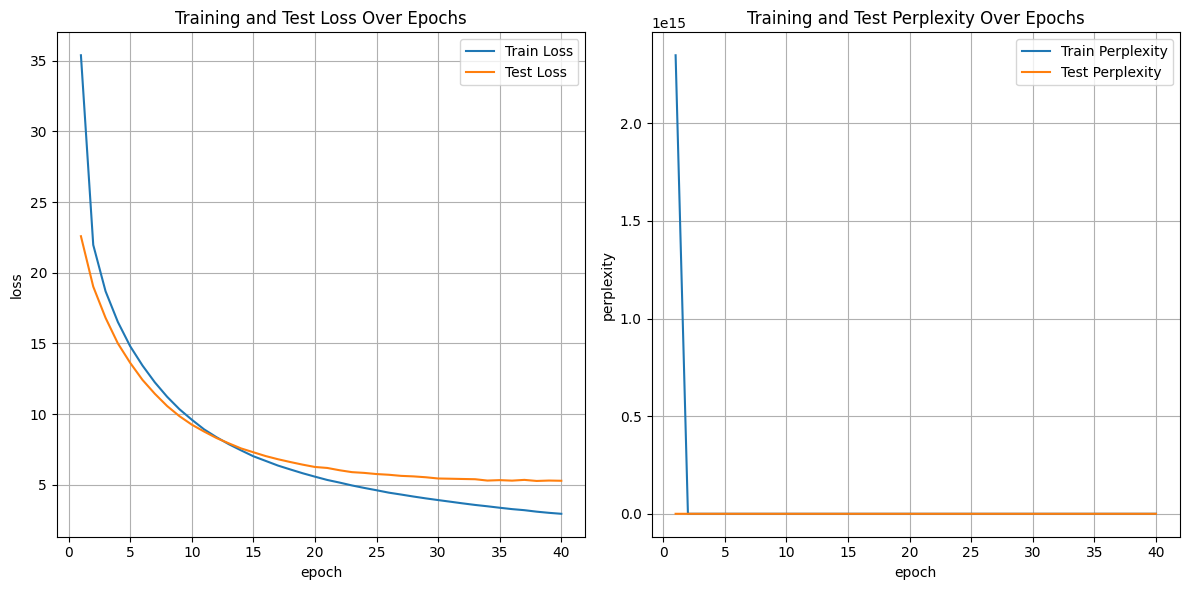

In [40]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = pd.read_csv(preprocessed_data)
data = data[:5000]
# Initialize tokenizer
tokenizer = Tokenizer(
    tokenizer_name="gpt2",
    special_tokens_dict={
        "bos_token": "[BOS]",
        "eos_token": "[EOS]",
        "pad_token": "[PAD]",
    },
)

img_size = 224

# Set training configuration
train_config = {
    "epochs": 40,
    "freeze_epochs": 2,
    "lr": 2e-5,
    "device": device,
    "weight_decay": 1e-6,
    "experiment_name": "runs/tmodel",
    "checkpoint": None,
    "train_size": 0.9,
    "batch_size": 16,
    "device": device,
    "max_len": 40,
}

# Update model configuration with device and tokenizer information
config["device"] = device
config["img_size"] = img_size
config["gpt_kwargs"]["device"] = device
config["vit_kwargs"]["device"] = device
config["gpt_kwargs"]["vocab_size"] = tokenizer.vocab_size
config["vit_kwargs"]["pretrained_model_name"] = "vit_tiny_patch16_224"
config["gpt_kwargs"]["ignore_index"] = tokenizer.get_vocab()[tokenizer.pad_token]

# Prepare data loaders for training and testing

train_dl, test_dl = train_test_split(
    train_config=train_config, model_config=config, data=data, tokenizer=tokenizer
)

# Initialize trainer
trainer = Trainer(
    model_config=config,
    train_config=train_config,
    dls=(train_dl, test_dl),
    tokenizer=tokenizer,
)

# Train the model and save metrics

metrics = trainer.fit()
metrics.to_csv("/content/training_data/checkpoints/metrics.csv")

# Plot training and test metrics
trainer.plot_metrics()


In [41]:
# # Define model and pipeline parameters
# checkpoint = "/content/training_data/checkpoints/imagecraft.pt"
# dev = 'cpu'# torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# max_len = 40  # Maximum length of captions

# # List of image paths to process
# image_paths = [
#     "/content/training_data/dataset/flickr30k/images/1000092795.jpg",
#     "/content/training_data/dataset/flickr30k/images/10002456.jpg",
#     "/content/training_data/dataset/flickr30k/images/1000268201.jpg",
#     "/content/training_data/dataset/flickr30k/images/1000344755.jpg"
# ]

# imagecraft = ImageCraft(checkpoint, max_len, dev)
# audio_buffer = imagecraft.generate(image_paths[0])
# display(Audio(audio_buffer, rate=16000))

In [42]:
checkpoint = "/content/training_data/checkpoints/imagecraft.pt"
device = 'cpu'
max_len = 40
def imagecraft_interface(image_path):
  """Process image inputs and generate audio response."""
  imagecraft = ImageCraft(checkpoint, max_len, device)
  audio_buffer = imagecraft.generate(image_path)
  return audio_buffer

# Define Gradio interface
gradio_interface = gr.Interface(
  fn=imagecraft_interface,
  inputs=[
    gr.Image(type="filepath", label="Upload an image")
  ],
  outputs=[
    gr.Audio(label="Output Audio")
  ],
  title="ImageCraft Assistant",
  description="Upload an image and get the speech responses.",
  allow_flagging="never"
)

# Launch the Gradio app
gradio_interface.launch(debug=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://174d9b023004ad4185.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
